# 1... Consider the credit card dataset which contains the following
columns:

In [28]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
credit_df = pd.read_csv("creditcard_DV.csv")
credit_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816
...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673
96,772629333,Existing Customer,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313
97,720336708,Existing Customer,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609
98,802013583,Existing Customer,56,M,3,College,$120K +,9689.0,2250,7439.0,1158


# 2...Create a bivariate plot to find if there is a correlation between 
credit card limit and average purchase made on the card.

Text(0.5, 1.0, 'Credit_Limit vs Avg_Purchase')

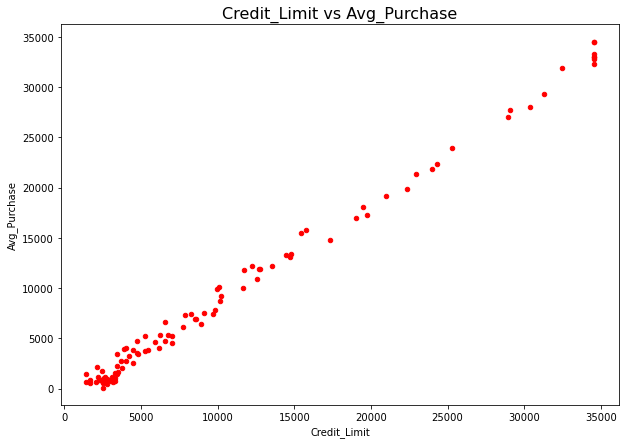

In [30]:
ax = credit_df.plot("Credit_Limit","Avg_Purchase",kind="scatter", color = "red",marker = "o",figsize=(10,7))

ax.set_xlabel("Credit_Limit") 
ax.set_ylabel("Avg_Purchase") 
ax.set_title("Credit_Limit vs Avg_Purchase",fontsize=16)

# 3... Visualise the distribution of values for credit card limit and average purchase made on the card. Also, identify the outliers in
the data, if any

In [31]:
credit_df["Credit_Limit"].describe()

count      100.000000
mean     10881.756000
std      10056.333148
min       1438.300000
25%       3309.250000
50%       6666.000000
75%      14746.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

Text(0.5, 1.0, 'Credit limit title')

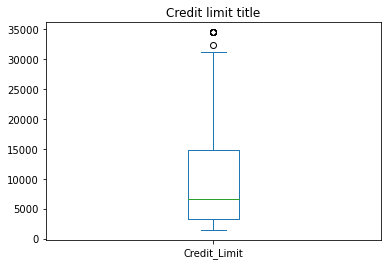

In [32]:
ax = credit_df["Credit_Limit"].plot(kind="box")
ax.set_title("Credit limit title")

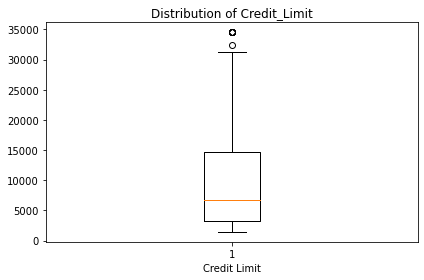

In [33]:
fig, ax1 = plt.subplots(1, 1)
ax1.boxplot(credit_df["Credit_Limit"])

ax1.set_title('Distribution of Credit_Limit')
ax1.set_xlabel('Credit Limit')

fig.tight_layout()

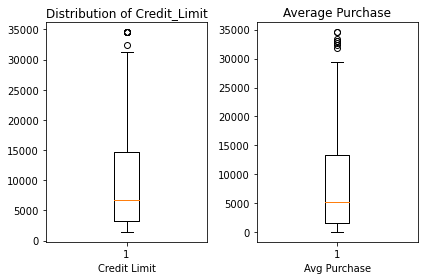

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(credit_df["Credit_Limit"])
ax2.boxplot(credit_df["Avg_Purchase"])

ax1.set_title('Distribution of Credit_Limit')
ax1.set_xlabel('Credit Limit')

ax2.set_title('Average Purchase')
ax2.set_xlabel('Avg Purchase')
fig.tight_layout()

In [36]:
import numpy as np
cr_limit_arr = credit_df["Credit_Limit"]
q1 = np.quantile(cr_limit_arr, 0.25)

q3 = np.quantile(cr_limit_arr, 0.75)
med = np.median(cr_limit_arr)

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

IQR: 11437.25
upper_bound: 31902.375
lower_bound: -13846.625


In [ ]:
outliers = cr_limit_arr[(cr_limit_arr <= lower_bound) | (cr_limit_arr >= upper_bound)]
print('The following are the outliers in the boxplot of Credit Limit: \n',outliers)

In [ ]:
x = credit_df['Credit_Limit']
v = x[(x == 34516)]
v

In [ ]:
avg_purchase = credit_df["Avg_Purchase"]

q1 = np.quantile(avg_purchase, 0.25)

q3 = np.quantile(avg_purchase, 0.75)
med = np.median(avg_purchase)

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

In [ ]:
outliers = avg_purchase[(avg_purchase <= lower_bound) | (avg_purchase >= upper_bound)]
print('The following are the outliers in the boxplot of Average Purchase: \n',outliers)

# 4...Provide a visual representation of the number of customers in
each income group using a bar chart.

In [ ]:
categories = credit_df["Income_Category"].unique()
categories

In [ ]:
count_df = pd.DataFrame(credit_df[["Income_Category"]].groupby(by="Income_Category").size().reset_index())
count_df.columns = [["Income_Category","Count"]]
count_df

In [ ]:
count_df.set_index('Income_Category',inplace = True)
count_df

In [ ]:
count_df['Count'].plot(kind="barh")
plt.title("numbser of customers in each income group")
plt.xlabel("Income_Category")
plt.ylabel("Count")

# 5... Plot the frequency distribution of the total transaction amount.

In [ ]:
credit_df["Total_Trans_Amt"].min()

In [ ]:
credit_df["Total_Trans_Amt"].max()

In [ ]:
credit_df["Total_Trans_Amt"].max() - credit_df["Total_Trans_Amt"].min()

In [ ]:
credit_df["Total_Trans_Amt"].plot(kind="hist")
plt.title("frequency distribution of the total transaction amount", fontsize=16)
plt.legend()

# 6...Graphically represent the percentage of customers retained and
those attrited. Highlight the latter by slicing it apart from the
main pie

In [37]:
Attrition_df = pd.DataFrame(credit_df[["Attrition_Flag"]].groupby(by = ["Attrition_Flag"]).size().reset_index())
Attrition_df.columns = [["Attrition_Flag","count"]]
Attrition_df                    

,Attrition_Flag,count
0,Attrited Customer,7
1,Existing Customer,93


In [38]:
Attrition_df.set_index('Attrition_Flag', inplace = True)
Attrition_df

,count
Attrition_Flag,
"(Attrited Customer,)",7
"(Existing Customer,)",93


<AxesSubplot:ylabel='(count,)'>

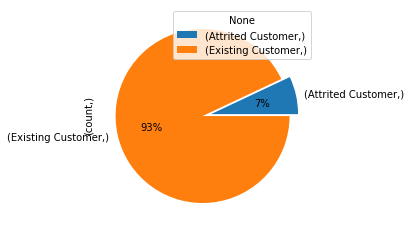

In [39]:
explode = (0.05, 0.05)
Attrition_df.plot(kind='pie', y='count', autopct='%1.0f%%',explode=explode)

# 7... Consider the Cars93 dataset which contains the following
columns:

In [41]:
cars_df = pd.read_csv("Cars93.csv")
columns = ["Manufacturer","Model","Type","Price","MPG.city","MPG.highway","Horsepower","Rear.seat.room","Passengers"]
cars_df[columns].head()

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,Horsepower,Rear.seat.room,Passengers
0,Acura,Integra,Small,15.9,25,31,140,26.5,5
1,Acura,Legend,Midsize,33.9,18,25,200,30.0,5
2,Audi,90,Compact,29.1,20,26,172,28.0,5
3,Audi,100,Midsize,37.7,19,26,172,31.0,6
4,BMW,535i,Midsize,30.0,22,30,208,27.0,4


# 8... Visualize the spread of data for the 'Price' Columns

<AxesSubplot:>

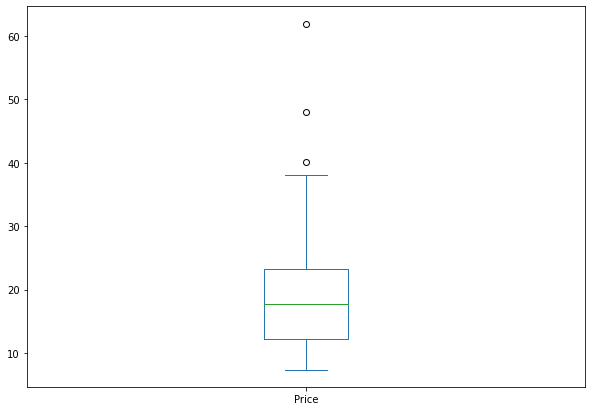

In [42]:
cars_df["Price"].plot(kind="box",figsize = (10,7))

# 9... Visualize the distribution of price for compact and large type of cars

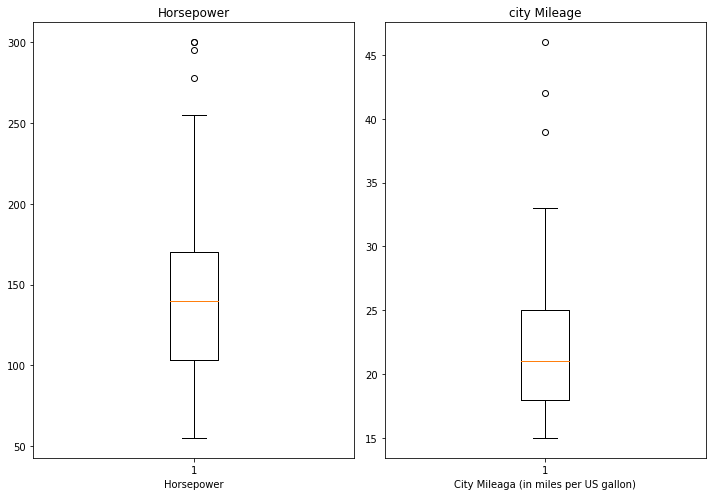

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(7)

ax1.boxplot(cars_df["Horsepower"])
ax2.boxplot(cars_df["MPG.city"])

ax1.set_title('Horsepower')
ax1.set_xlabel('Horsepower')
ax2.set_title('city Mileage')
ax2.set_xlabel("City Mileaga (in miles per US gallon)")

fig.tight_layout()

# 10... Visualize the distribution of price for each type of car

Text(0.5, 1.0, 'Van')

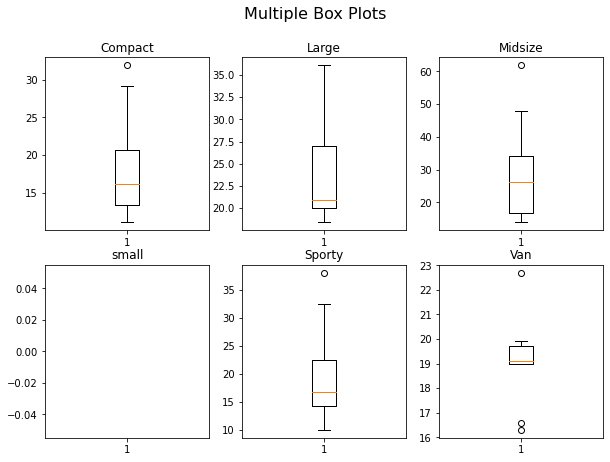

In [45]:
fig, ax = plt.subplots(2, 3)
fig.set_figwidth(10)
fig.set_figheight(7)
fig.suptitle("Multiple Box Plots", fontsize=16)

ax[0][0].boxplot(cars_df["Price"][cars_df["Type"]=="Compact"])
ax[0][0].set_title('Compact')

ax[0][1].boxplot(cars_df["Price"][cars_df["Type"]=="Large"])
ax[0][1].set_title('Large')

ax[0][2].boxplot(cars_df["Price"][cars_df["Type"]=="Midsize"])
ax[0][2].set_title('Midsize')

ax[1][0].boxplot(cars_df["Price"][cars_df["Type"]=="small"])
ax[1][0].set_title('small')

ax[1][1].boxplot(cars_df["Price"][cars_df["Type"]=="Sporty"])
ax[1][1].set_title('Sporty')

ax[1][2].boxplot(cars_df["Price"][cars_df["Type"]=="Van"])
ax[1][2].set_title('Van')

# 11... Visualize the correlation between Horsepower and Mileage in the city

Text(0.5, 1.0, 'Horsepower vs MPG.city')

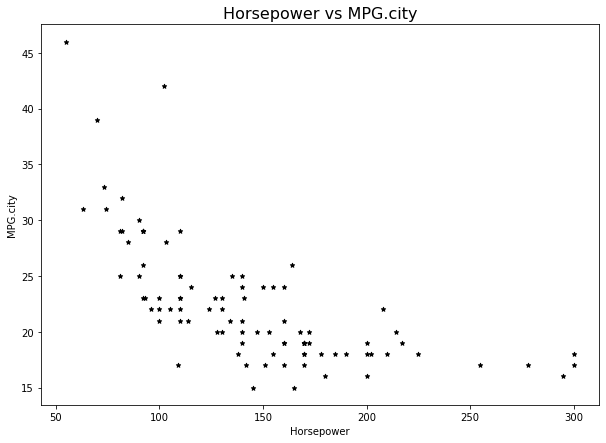

In [46]:
ax = cars_df.plot(["Horsepower"],["MPG.city"],kind="scatter", color= "black",marker = "*",figsize=(10,7))

ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG.city")
ax.set_title("Horsepower vs MPG.city",fontsize=16)

# 12... Visualize the correlation between Horsepower and Mileage in the city for each type of car